In [ ]:
!pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.4 MB/s eta 0:00:00


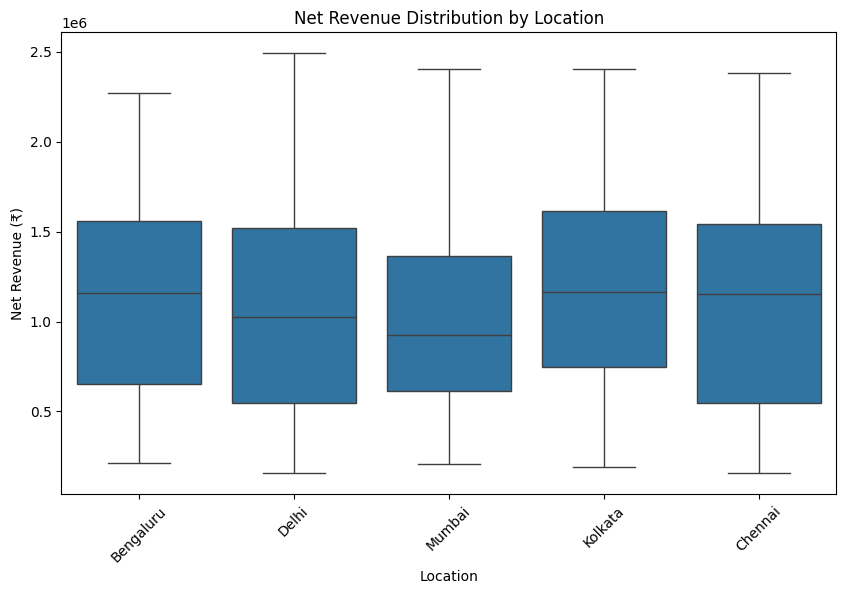

(       Monthly Subscription (₹)  Daily Orders  Average Order Value (₹)  \
 count                500.000000    500.000000               500.000000   
 mean                1324.000000     84.672000               450.400000   
 std                  617.889614     38.972068                88.251099   
 min                 1000.000000     20.000000               300.000000   
 25%                 1000.000000     49.750000               373.000000   
 50%                 1000.000000     87.500000               447.500000   
 75%                 1000.000000    120.000000               527.000000   
 max                 2500.000000    149.000000               599.000000   
 
        Ingredients Purchased (₹)  Wastage (%)  Monthly Revenue (₹)  \
 count                 500.000000   500.000000         5.000000e+02   
 mean                29954.094000     9.747380         1.149766e+06   
 std                 11645.989728     2.799063         5.894775e+05   
 min                 10054.000000     5

In [ ]:
# Step 2: Prototype Development - Simulating a dataset and performing basic EDA and ML modeling

import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Faker
faker = Faker()

# Parameters for simulation
num_restaurants = 500
locations = ['Delhi', 'Mumbai', 'Bengaluru', 'Chennai', 'Kolkata']
sizes = ['Small', 'Medium', 'Large']
subscription_tiers = ['Basic', 'Premium']

# Generate dataset
data = {
    'Restaurant ID': [faker.uuid4() for _ in range(num_restaurants)],
    'Location': np.random.choice(locations, num_restaurants),
    'Restaurant Size': np.random.choice(sizes, num_restaurants, p=[0.6, 0.3, 0.1]),
    'Monthly Subscription (₹)': np.random.choice([1000, 2500], num_restaurants, p=[0.8, 0.2]),
    'Daily Orders': np.random.randint(20, 150, num_restaurants),
    'Average Order Value (₹)': np.random.randint(300, 600, num_restaurants),
    'Ingredients Purchased (₹)': np.random.randint(10000, 50000, num_restaurants),
    'Wastage (%)': np.random.uniform(5, 15, num_restaurants),
}

# Create DataFrame
df = pd.DataFrame(data)

# Derived fields
df['Monthly Revenue (₹)'] = df['Daily Orders'] * df['Average Order Value (₹)'] * 30
df['Inventory Wastage (₹)'] = (df['Ingredients Purchased (₹)'] * df['Wastage (%)']) / 100
df['Net Revenue (₹)'] = df['Monthly Revenue (₹)'] - df['Ingredients Purchased (₹)'] - df['Inventory Wastage (₹)']

# EDA: Summary statistics and visualization
summary_stats = df.describe()

# Visualizations
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Net Revenue (₹)', data=df)
plt.title('Net Revenue Distribution by Location')
plt.xticks(rotation=45)
plt.show()

# ML Modeling: Predicting Net Revenue based on other features
X = df[['Daily Orders', 'Average Order Value (₹)', 'Ingredients Purchased (₹)', 'Wastage (%)']]
y = df['Net Revenue (₹)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
summary_stats, mse, r2
